# The project is based on synthetic dataset representing laptop price
<ul><li>The dataset was uploaded by MRSIMPLE at kaggle and consist of 1000 of laptops with 7 features</li>
    <li>My project assignment involves developing a machine learning algorithm capable of forecasting the price of laptops using its attributes based on this selected dataset</li>
<ul>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np


# Reading the Dataset

In [3]:
df = pd.read_csv('Laptop_price.csv')

In [5]:
df.head() #Top 5 rows of the dataset

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [6]:
df.shape #Shape of the dataset

(1000, 7)

In [7]:
df.drop_duplicates() #dropping duplicate rows
df.shape

(1000, 7)

In [8]:
df.columns #columns of the dataset

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [12]:
df.info() #information of each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


# Key observations: Data Description


Features:
* Brand: Brand name of the Laptop (for example: HP, Asus)
* Processor_Speed: Speed of the processor in GHz
* RAM_Size: Meomory Size of RAM of the laptop in GB (Gigabyte)
* Storage_Capacity: Hardrive Storage Capacity in GB
* Screen_Size:  Size of the laptop screen in inches
* Weight: Weight of the Laptop in Kg
* Price: Price of the laptop

# Problem Statement Definition

To create an ML model suitable to predict the price of the laptop based on some various feautres. <br> 
<b>Target Variable</b>: Price 

# Model Intuition
As the target variable (price) is continuos and based on the problem statemnet, we need to predict the price with the help of the above labeled dataset. Therefore, we need to create a Supervised Regression Machine learning model for our prediction

# Missing Values Analysis

Missing values can distort statistical analysis and machine learning models if not handled properly. Ignoring missing values or applying incorrect imputation techniques can lead to biased estimates, reduced statistical power, and inaccurate predictions.

Missing value analysis involves selecting appropriate imputation techniques to fill in missing values. Common imputation methods include mean, median, mode imputation, regression imputation, k-nearest neighbors imputation, and multiple imputation. Each method has its assumptions and suitability depending on the dataset and the nature of missingness.


In [53]:
df.isna().sum() #Checking for null values

Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

Conclusion: There aren't any missing values in our dataset, so it reduces our hassle for there imputation. 

# Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

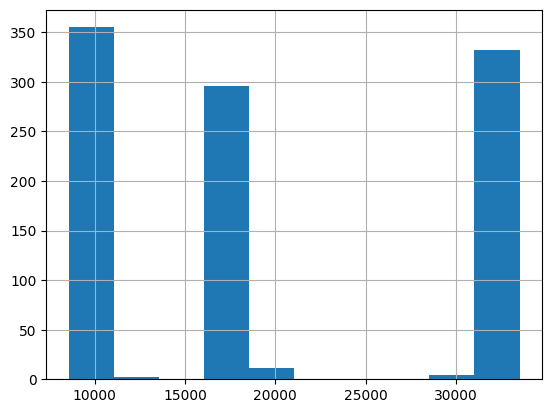

In [22]:
df['Price'].hist()

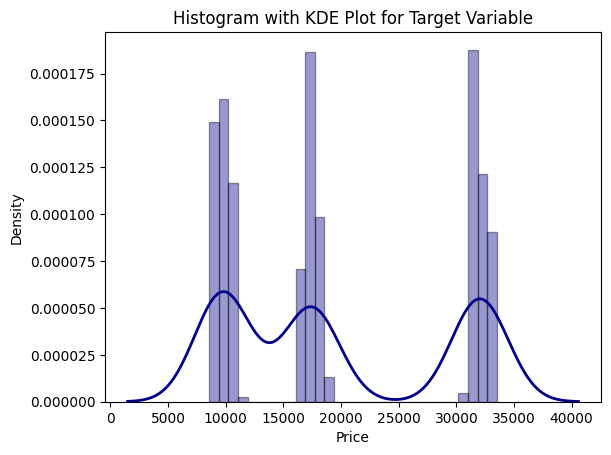

In [21]:
sns.distplot(df['Price'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Histogram with KDE Plot for Target Variable')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Key observation from the Price distribution
The pricing of the laptop is distributed in 1000, 2000, and 3000 range. The density of Laptops of Price range from 7000-11000, 17000 - 19000, and 30000- 34000 are high, whereas others are very low. 
Based on the kde plot, the target variable (Price), in this case, seems to have a right-skewed distribution. This means there are more instances with lower prices and fewer instances with higher price.

Here are some approaches to predicting the value of a target variable (Price) based on a right-skewed distribution:

* <b>Transform the Price:</b> We can try transforming the target variable using a log transformation or a square root transformation. This can help to normalize the distribution and make it more symmetrical.

* <b>Using a regression algorithm that is robust to skewed data:</b> Some regression algorithms, such as Poisson regression or Huber regression, are more robust to skewed data than others.

In [28]:
df.describe() #Gaining insights of all the numerical features

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [30]:
df.nunique() #Looking for uniques values in each columns

Brand                  5
Processor_Speed     1000
RAM_Size               4
Storage_Capacity       3
Screen_Size         1000
Weight              1000
Price               1000
dtype: int64

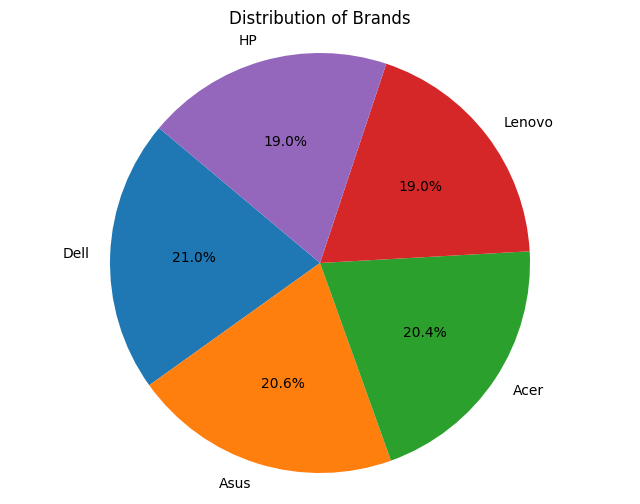

In [32]:
brand_counts = df['Brand'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

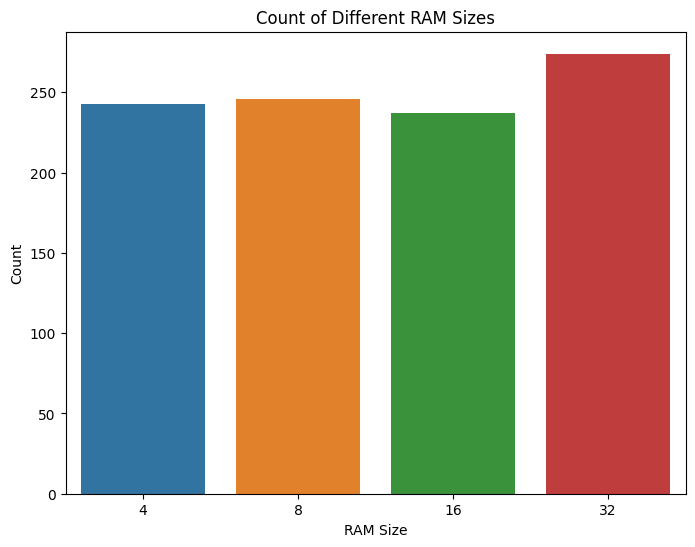

In [33]:
# Plotting the countplot for RAM sizes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RAM_Size')
plt.title('Count of Different RAM Sizes')
plt.xlabel('RAM Size')
plt.ylabel('Count')
plt.show()

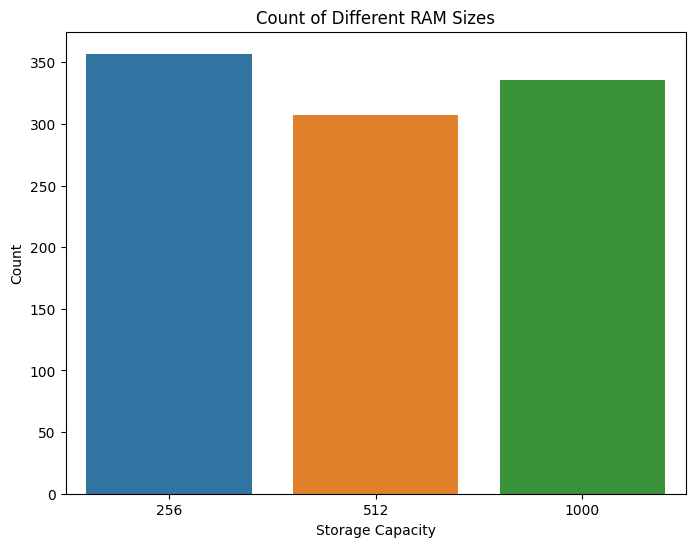

In [35]:
# Plotting the countplot for Storage Capacity
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Storage_Capacity')
plt.title('Count of Different RAM Sizes')
plt.xlabel('Storage Capacity')
plt.ylabel('Count')
plt.show()

# Insights from Count distribution of Brands, RAM Sizes, and Storage Capacity

We can see that the overall count distribution of the instances of each Brands, Ram sizes and Storage capaicty is almost equal and equally distributed. This is good for our data as there isn't any biasness in the raw data. 

# Multivariate Data Visualization

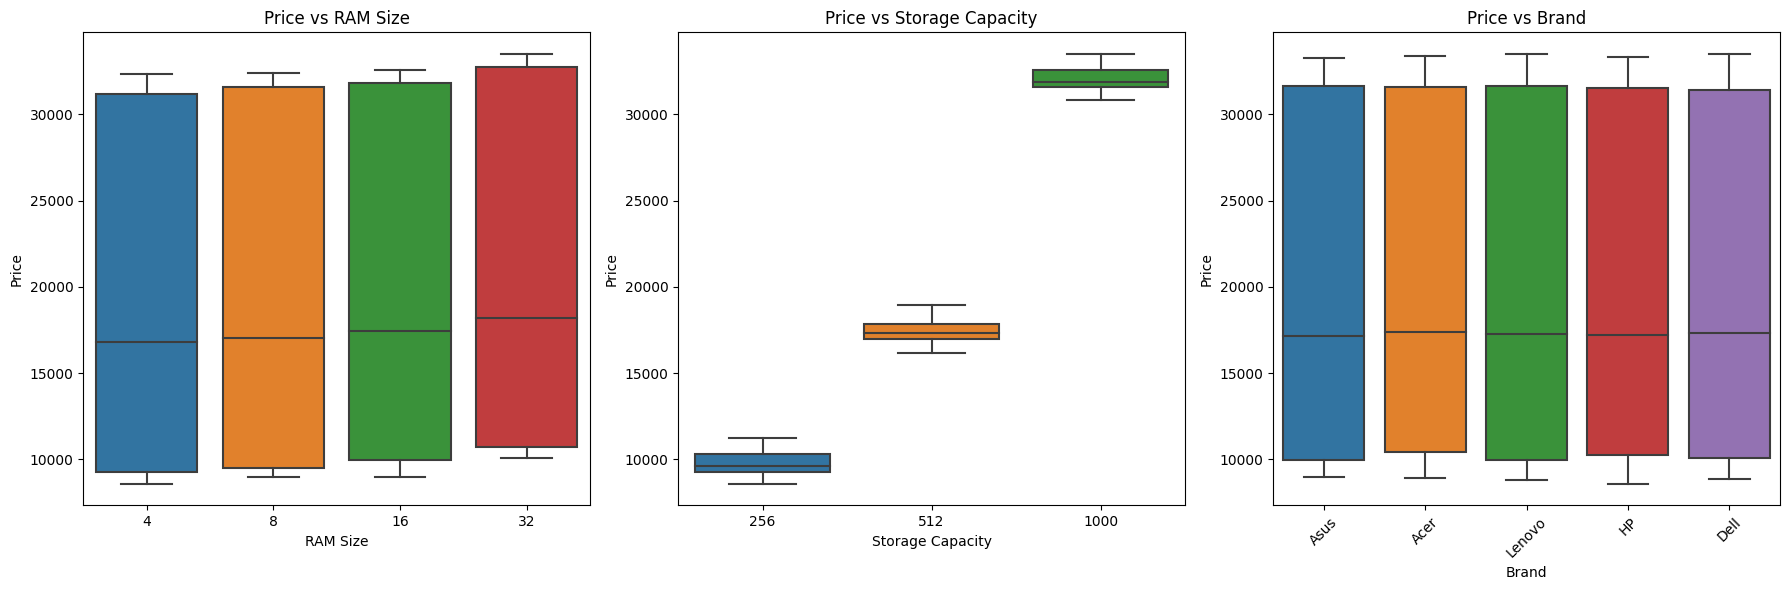

In [40]:
# Plotting the box plot to find out the relationship between Price with Ram size, storage capacity and brand name




# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Price and RAM_Size
sns.boxplot(data=df, x='RAM_Size', y='Price', ax=axes[0])
axes[0].set_title('Price vs RAM Size')
axes[0].set_xlabel('RAM Size')
axes[0].set_ylabel('Price')

# Box plot for Price and Storage_Capacity
sns.boxplot(data=df, x='Storage_Capacity', y='Price', ax=axes[1])
axes[1].set_title('Price vs Storage Capacity')
axes[1].set_xlabel('Storage Capacity')
axes[1].set_ylabel('Price')

# Box plot for Price and Brand
sns.boxplot(data=df, x='Brand', y='Price', ax=axes[2])
axes[2].set_title('Price vs Brand')
axes[2].set_xlabel('Brand')
axes[2].set_ylabel('Price')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

<b>Conclusion from this box plots: </b>
* Here with Price vs Brand box plot, we can clearly see that the median, upper limit and lower limit of each brands are consistent. Therefore, brand name doens't really matter and doesn't have any relationship with the price. 

* From Price vs Storage Capacity, we can see that the more the storage capacity the more is the pricing, so it is one of the most required feature that helps in our future prediction

* From Price Vs Ram Size, the Ram size does influence the pricing but not that much, the median and the lower and upper quartile also has slightly higher values when the RAM size increases

In [46]:
df.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,3.830296,16,512,11.185147,2.641094,17395.093065
1,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3.241627,4,256,11.853023,2.029061,9291.023542
3,3.806248,16,512,12.280360,4.573865,17436.728334
4,3.268097,32,1000,14.990877,4.193472,32917.990718


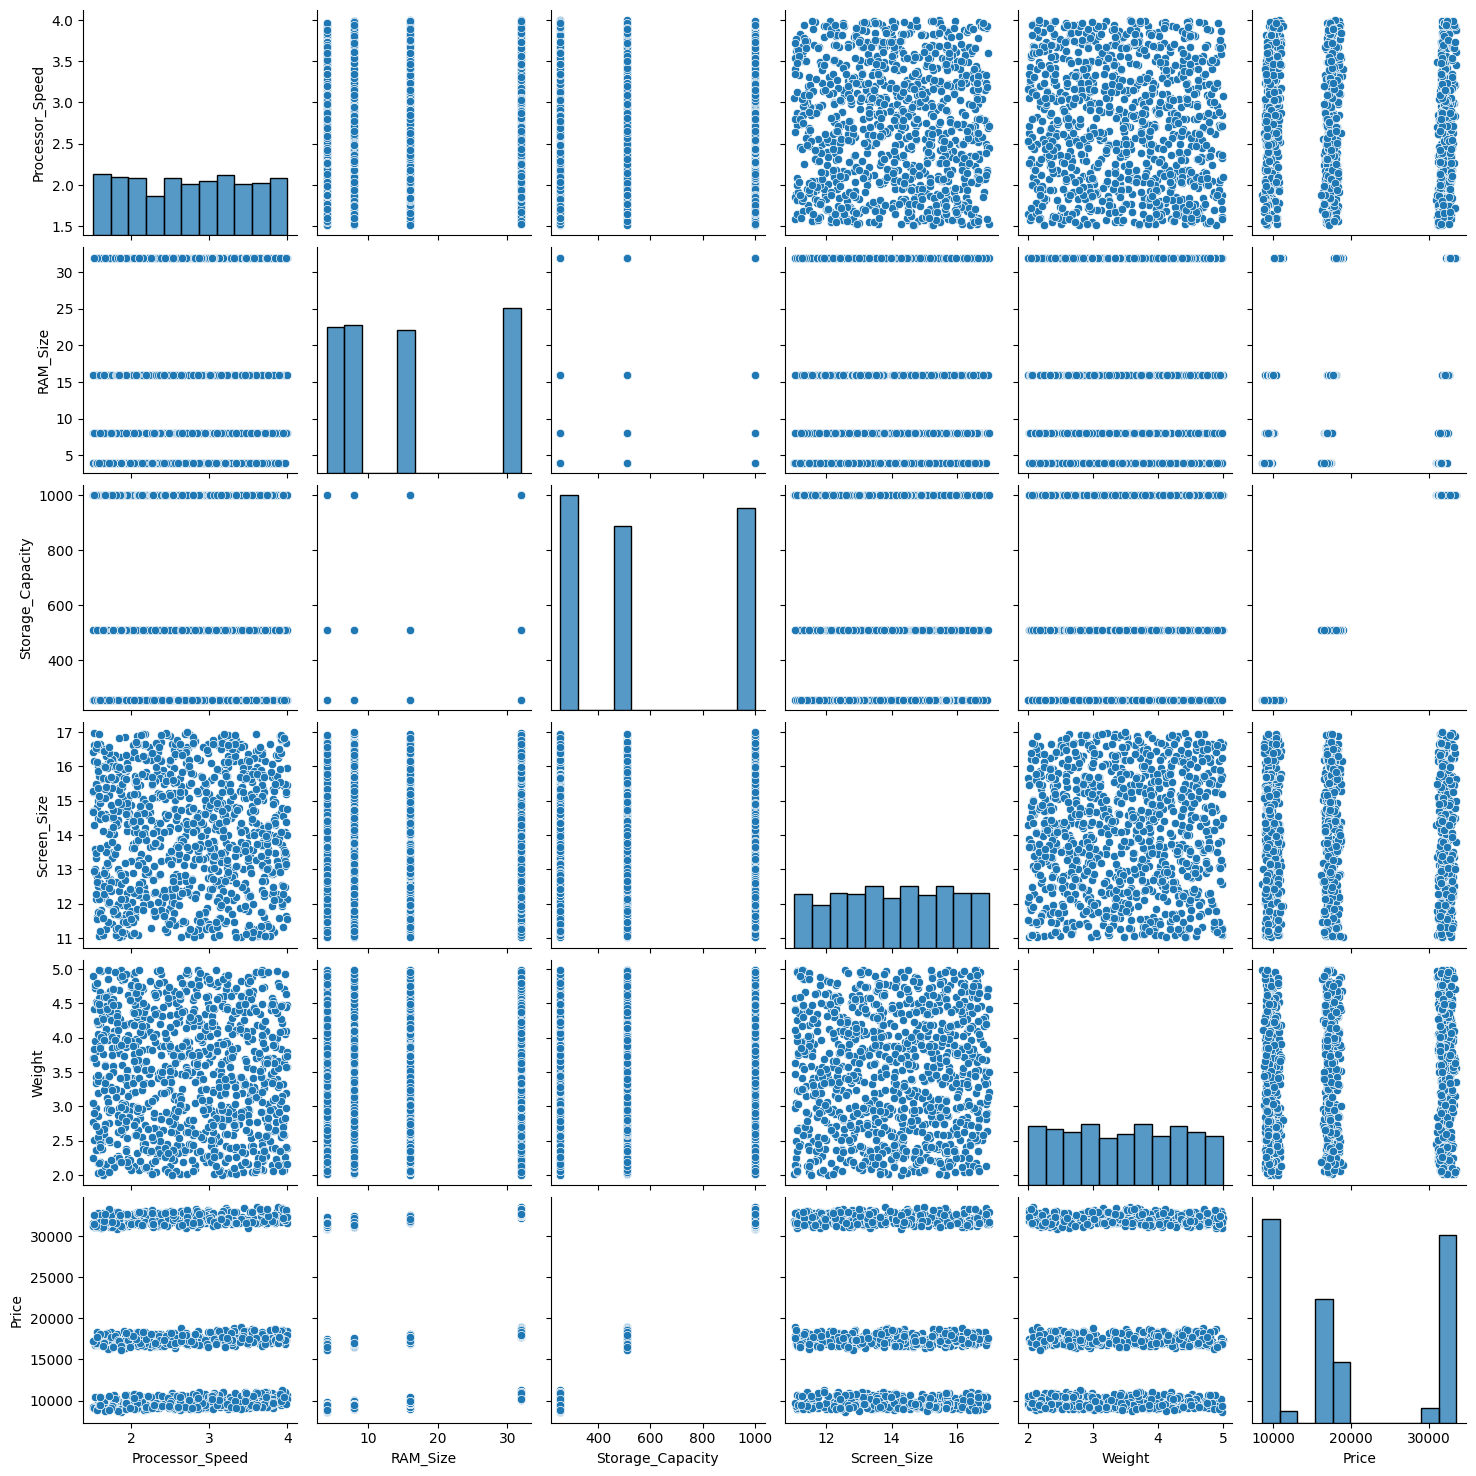

In [47]:
sns.pairplot(data=df, vars=["Processor_Speed", "RAM_Size","Storage_Capacity",
                            "Screen_Size","Weight", "Price"])
plt.savefig('pair_plot.jpg') 
plt.show()


# Removing Unwanted columns

From the above relationship of Price vs Brand, we can conclude, the brand name is unwanted, so we can remove the column


In [42]:
# Removing the Brand column

df.drop(columns=['Brand'], inplace=True)

# Distribution all the continous variables

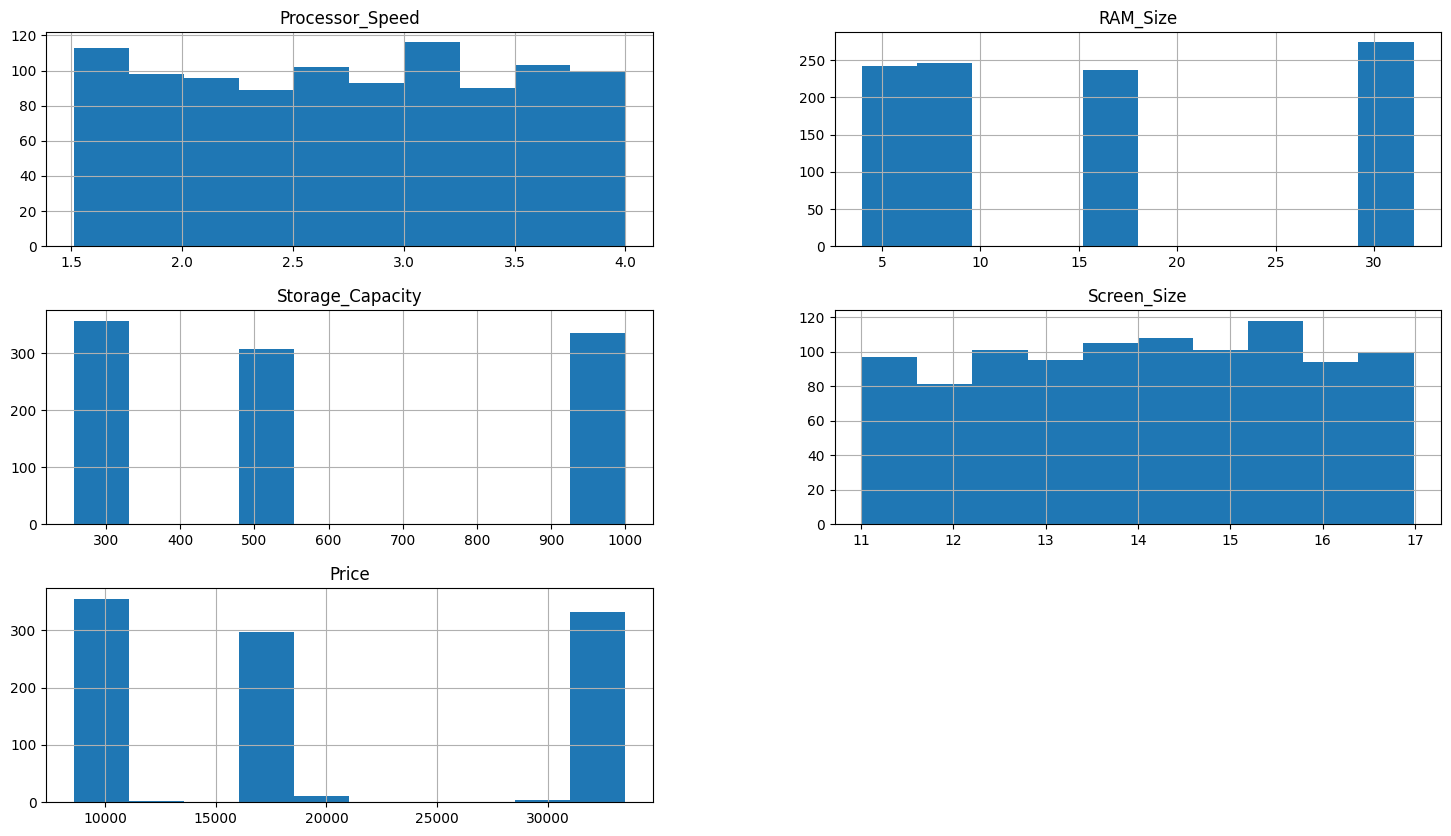

In [50]:
df.hist(['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Price'], figsize=(18,10))
plt.show()

# Correlation Analysis

In [56]:
corr_matrix = df.corr()
corr_matrix

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


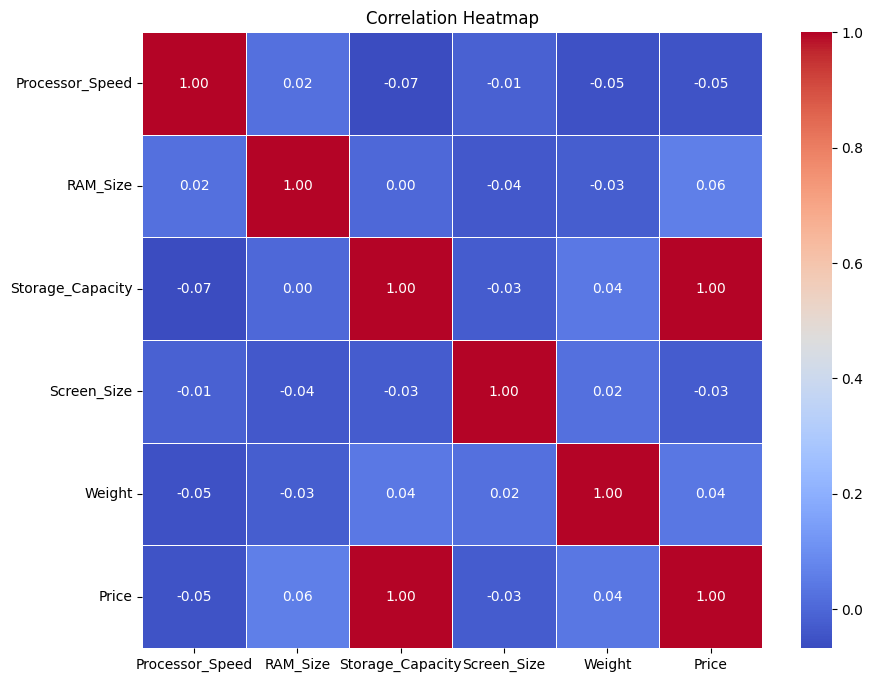

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<b>Conclusion:</b> Analysing the correlation of the numerical features of the dataset, we can clearly see that the pricing of the laptop is highly dependent on Storage Capacity with positive correlation of 0.997 which is nearly an ideal correlation of 1. To create a very accurate machine learning model, we can only take storage_capacity as a single variable as independent variable and Price and dependent variable, and that can too give us a very precise model, based on this dataset, but that model can't be implied in real life, as the dataset is really biased with storage capacity which is not in the real life.  

# Pre-training Feature Selection

Based on above analysis and visualization, in this dataset, The pricing of the laptop is highly dependent on the storage capacity and slightly dependent on the RAM size and processor speed. So our selected feautres based on EDA are <b>Storage_Capacity</b>,  <b>RAM_Size</b> and <b>Processor_Speed</b>

# Statistical Feature Selection using ANOVA test

In [62]:
from sklearn.feature_selection import f_regression
f_scores, p_values = f_regression(df.drop(columns=['Price']), df['Price'])
anova_results = pd.DataFrame({
    'Feature': df.drop(columns=['Price']).columns,
    'F-Score': f_scores,
    'P-Value': p_values
})


In [63]:
anova_results

,Feature,F-Score,P-Value
0,Processor_Speed,2.575759,0.108828
1,RAM_Size,3.756525,0.052884
2,Storage_Capacity,237762.019784,0.000000
3,Screen_Size,0.714096,0.398290
4,Weight,1.475063,0.224836


The p-values of RAM_Size and Storage_Capacity is less than 0.05, which means they are statistically significant predictors of "Price." we can consider using these features for further analysis and modeling, while the other features may be less influential or require additional investigation.

<b>Conclusion:</b> Based on both visualization and statistical feature selection using ANOVA Test, we can assure that Storage capacity and RAM_size are used for further analysis and modeling. So as the pre-training feature selection, we select <b>Storage_Capacity</b>, <b>RAM_Size</b>, and <b>Processor_Speed</b> as our feautres for our Supervised Machine Learning Regression Model

# Data Pre-Processing
Data preprocessing is a crucial step in the machine learning pipeline that involves transforming raw data into a format suitable for analysis and modeling. It plays a significant role in improving the quality, consistency, and efficiency of machine learning models. 

<h2>Data Cleaning:</h2>

* Handling missing values.
* Removing duplicates.

* Dealing with outliers.

* Correcting errors in the data.
<h2>Data Transformation:</h2>
* Feature scaling (e.g., normalization, standardization).
* Handling categorical variables (e.g., one-hot encoding, label encoding).
* Dimensionality reduction (e.g., PCA, feature selection).
* Handling skewed distributions (e.g., log transformation).
<h2>Feature Engineering:</h2>
* Creating new features based on existing ones.
* Feature extraction from text, images, or other unstructured data.
* Time-series feature engineering (e.g., lag features, rolling statistics).
<h2>Data Integration:</h2>
* Merging or joining multiple datasets.
* Handling data from different sources or formats.
* Resolving schema conflicts and inconsistencies.
<h2>Data Normalization:</h2>
* Scaling numerical features to a standard range.
* Ensuring that all features have similar scales to prevent bias in the model.
<h2>Data Splitting:</h2>
* Splitting the dataset into training, validation, and test sets to evaluate model performance.

 # Data Standardization/Normalization

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:,[0,1,2,]])
scaled_df = pd.DataFrame(scaled_data, columns=['Processor_Speed', 'RAM_Size','Storage_Capacity'])


In [137]:
scaled_df

,Processor_Speed,RAM_Size,Storage_Capacity
0,0.932352,0.428571,0.344086
1,0.563441,0.000000,1.000000
2,0.695649,0.000000,0.000000
3,0.922682,0.428571,0.344086
4,0.706292,1.000000,1.000000
...,...,...,...
995,0.736646,0.000000,1.000000
996,0.510253,0.142857,0.000000
997,0.679140,0.000000,0.344086
998,0.037235,0.142857,0.000000


# Train-Test Split

In [147]:
from sklearn.model_selection import train_test_split
X = scaled_df
y = df['Price']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Linear Regression


In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [189]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Linear Regression Evaluation

In [190]:
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("R2 Score: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE: 154.4388910990349
R2 Score:  0.9995789071105388
MSE:  38642.442193392955
RMSE:  196.5768099074582


In [168]:
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print("Cross-Validation Scores (R2 Score):", scores)
print("Mean R2 score:", np.mean(scores))
print("Standard Deviation of R2:", np.std(scores))

Cross-Validation Scores (R2 Score): [0.99955024 0.99953468 0.99952869 0.9996323  0.99938571 0.99945194
 0.99964687 0.99956988 0.9996242  0.99953059]
Mean R2 score: 0.9995455098210282
Standard Deviation of R2: 7.715527068368654e-05


# Decision Tree Regressor

In [152]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Decision Tree Regressor Model Evaluation

In [153]:
y_pred = decision_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("R2 Score: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE: 215.08105550285225
R2 Score:  0.9991638412009315
MSE:  76731.80636899482
RMSE:  277.0050656016868


In [154]:
# K-fold Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_regressor, X, y, cv=10, scoring='r2')
print("Cross-Validation Scores (R2 Score):", scores)
print("Mean R2 score:", np.mean(scores))
print("Standard Deviation of R2:", np.std(scores))

Cross-Validation Scores (R2 Score): [0.99927564 0.9991925  0.99934295 0.99920453 0.99884409 0.9990257
 0.99933866 0.99895538 0.99938361 0.99903106]
Mean R2 score: 0.9991594113242552
Standard Deviation of R2: 0.0001755358124608955


# Model Optimization: Hyperparameter tuning using GridSearchCV

In [105]:


from sklearn.model_selection import GridSearchCV

dt_regressor = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=decision_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: -8.375532572172016e-05


In [107]:
tuned_DTregressor = grid_search.best_estimator_
y_pred = tuned_DTregressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("R2 Score: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE: 0.007432019736953719
R2 Score:  0.9993734627658335
MSE:  8.666333054754849e-05
RMSE:  0.009309314182449128


# Selection of the Best Model

As we can analyse the MAE, r2, MSE and RMSE, Linear Regression outperformed the Decision Tree Regressor even after tuning the hyperpameters. And as the dataset is very fitted for linear regression and also the accuracy is also very high and satisfactory, it will be just a waste of time to analyse other model, as the accuracy of linear regression is too high (r2 of 0.9995), therfore, we can use Linear Regression as our best model. 

# Model Deployment
In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file (pickle file) which can be stored anywhere.

* Create a python function which can be called or triggered 

* Create a django project and use DRF for api and connect it using frontend (html, css, js) and deploy it in python anywhere


## Re-training the model with full data before deployment

In [191]:
Final_RegressionModel = regressor.fit(X,y)
Final_RegressionModel

LinearRegression()

# Saving the model as pickle file (serialized file) for ease of use

In [192]:
import pickle
import os


with open('Final_RegressionModel.pkl', 'wb') as fp:
    pickle.dump(Final_RegressionModel, fp)
    fp.close()

print('Location of saved Pickle file for our final ML model:',os.getcwd())

Location of saved Pickle file for our final ML model: C:\jupyter_practice\capstone_project


# Function for prediction 

In [200]:
def predictionFunction(input_data):
    with open('Final_RegressionModel.pkl', 'rb') as f:
        model = pickle.load(f)
        f.close()
    input_data = scaler.transform(input_data) #Scaling the data before predicting because thats what we did during model training
    result = model.predict(input_data)
    return result

# Testing the function

In [206]:
predictionFunction([[2.9,16,516]])

array([17603.6078894])

# Serializing the prediction function

In [207]:
with open('predictionFunction.pkl','wb') as fp:
    pickle.dump(predictionFunction, fp)

# Web deployment with Django

To deploy the project with django we will create a django-project within the folder 'server'. And then install Django-Restframework for easy api development. The api development code is in the 'server\views.py', and the url is in the 'server\urls.py' file. 

The overall django-server deployment code is in the 'server' folder. To run the server we usually run the "manage.py" file.  Likewise, this overall project from Dataset analyis to ML model development to Web deployement using Django and DRF is in my GitHub. 

Project Github Repository Link: 